**Lab-08: Backpropagation**

Trong bài thực hành này chúng ta sẽ thử cài đặt Backpropagation 

Ta muốn dựa vào 2 chiều của lá, phân biệt giữa loại lá 1 và loại lá 2. Cụ thể, với $x = (x_1,x_2, 1)$ là input, ta muốn đoán một phân phối
    $$ P_\\theta(c|x),c = 0, 1 $$
với $\\theta$ là các tham số
Ta mô hình $P_\theta$ là một neural network có 2 lớp ẩn, mỗi lớp 5 neurons, tức là\n",
    $$ P_\\theta(c|x) = \\text{softmax}(\\max(0, \\max(0, x \\cdot W_1 + b_1) \\cdot W_2 + b_2) \\cdot W_3 + b_3 )$$

với $x$ là vector dòng $[[x_1, x_2]]$ kích thước $ 1\times 2$, $W_1, W_2, W_3$ là các ma trận có kích thước $2 \times 5, 5 \times 5, 5 \times 3$, và $b_1, b_2, b_3$ là các ma trận kích thước $1 \times 5, 1 \times 5, 1 \times 3$.

Khi đó $P(c|x)$ là một vector dòng độ dài 3, xem như $P(c|x)= (P_1(c|x), P_2(c|x), P_3(c|x)) = (P(c=0|x), P(c=1|x), P(c=2|x))$
Bộ các ma trận $\\theta = (W_1, W_2, W_3, b_1, b_2, b_3)$ chính là tham số cần tìm của model. Giờ cần tìm $\\theta$ sao cho 

$$ L = \frac{1}{N} \sum_{x,y} - y_0 \log P_\theta(0|x) -  y_1 \log P_\theta(1|x) - y_2 \log P_\theta(2|x) $$

đạt giá trị nhỏ nhất với $y = (y_0, y_1, y_2)$ là one-hot vector biểu thị loại lá tương ứng với $x$



#Bài Tập

1. Từ code demo hãy cài đặt thêm một module để chọn ra được bộ weights sao cho accuracy trên tập validation là tốt nhất.
2. Từ bộ dữ liệu bên dưới hãy cài đặt backpropagation cho bài toán phân biệt ung thư vú. Hãy tự chọn số layers và số nodes mà mình cho là thích hợp, cũng như là nêu ra số layers và số nodes của mỗi layer mà mình đã chọn. Tính accuracy trên tập training.

# Câu 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from __future__ import division, print_function, unicode_literals
import math


# Preprocessing

In [2]:
def one_hot_vector(y):
    out = np.zeros((y.shape[0], max(y)+1))
    for i in range(y.shape[0]):
        out[i, y[i]] = 1
    return out

In [3]:
train = pd.read_csv("https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-08/bt_train.csv")
valid = pd.read_csv("https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-08/bt_valid.csv")

x1_train = train["x1"].values
x2_train = train["x2"].values
y_train = train["label"].values

x1_valid = valid['x1'].values
x2_valid = valid['x2'].values
y_valid = valid['label'].values

# normalize
x1_mean = np.mean(x1_train)
x1_std = np.std(x1_train)
x2_mean = np.mean(x2_train)
x2_std = np.std(x2_train)

x1_train = (x1_train - x1_mean)/ x1_std
x2_train = (x2_train - x2_mean)/ x2_std

x1_valid = (x1_valid - x1_mean)/ x1_std
x2_valid = (x2_valid - x2_mean)/ x2_std



X_train = np.concatenate([x1_train.reshape(-1,1), x2_train.reshape(-1,1)], axis=1)
y_train = one_hot_vector(y_train)

X_valid = np.concatenate([x1_valid.reshape(-1,1), x2_valid.reshape(-1,1)], axis=1)

In [4]:
# initialize
np.random.seed(4)
W1 = np.random.randn(2,5)
W2 = np.random.randn(5,5)
W3 = np.random.randn(5,3)
W4 = np.random.randn(3,3)

b1 = np.random.randn(1,5)
b2 = np.random.randn(1,5)
b3 = np.random.randn(1,3)
b4 = np.random.randn(1,3)

In [5]:
def relu(h):
    return np.array([max(0,i) for i in h.reshape(-1)]).reshape(h.shape)

def softmax(z):
    return np.exp(z)/ np.sum(np.exp(z), axis=1).reshape(-1,1)

def CrossEntropy(o,y):
    return - np.sum(np.log(o)*y)
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

def cost(o, y):
    return -np.sum(y*np.log(o))/y.shape[1]
ln = 0.053
N = y_train.shape[0]

Epoch 0, loss: 1296.391224
Epoch 1, loss: 1219.947704
Epoch 2, loss: 1156.076199
Epoch 3, loss: 1098.058695
Epoch 4, loss: 1024.442286
Epoch 5, loss: 864.332364
Epoch 6, loss: 739.092498
Epoch 7, loss: 713.778453
Epoch 8, loss: 687.183466
Epoch 9, loss: 664.988146
Epoch 10, loss: 643.559920
Epoch 11, loss: 630.623356
Epoch 12, loss: 624.779138
Epoch 13, loss: 620.039717
Epoch 14, loss: 612.885258
Epoch 15, loss: 604.934315
Epoch 16, loss: 601.011752
Epoch 17, loss: 595.821730
Epoch 18, loss: 591.542236
Epoch 19, loss: 585.574857
Epoch 20, loss: 582.917637
Epoch 21, loss: 579.335152
Epoch 22, loss: 575.285975
Epoch 23, loss: 573.420958
Epoch 24, loss: 572.376193
Epoch 25, loss: 567.871127
Epoch 26, loss: 563.517325
Epoch 27, loss: 560.364961
Epoch 28, loss: 558.128229
Epoch 29, loss: 556.203169
Epoch 30, loss: 554.408931


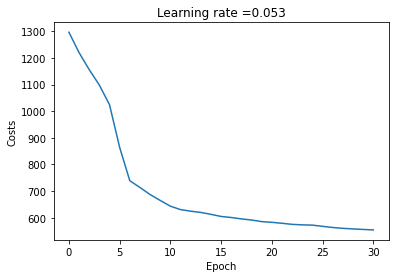

In [6]:
costs = []
for epochs in range(31):
    # foward
    z1 = np.dot(X_train, W1) + b1
    o1 = relu(z1)

    z2 = np.dot(o1, W2) + b2
    o2 = relu(z2)

    z3 = np.dot(o2, W3) + b3
    o3 = np.tanh(z3)
    
    z4 = np.dot(o3, W4) + b4
    o4 = softmax(z4)
    
    # print loss after each 1000 iterations
    if epochs %1 == 0:
        # compute the loss: average cross-entropy loss
        loss = CrossEntropy(o4, y_train)
        costs.append(loss)
        print("Epoch %d, loss: %f" %(epochs, loss))

    # backpropagation
    dL_dz4 = 1/len(X_train)*(o4 - y_train) 
    dL_dW4 = np.dot(o3.T, dL_dz4)    
    dL_db4 = np.sum(dL_dz4, axis = 0)


    dL_do3 = np.dot(dL_dz4, W4.T)
    dL_dz3 = dL_do3.copy()
    dL_dz3[z3 < 0] = 0
    dL_dW3 = np.dot(o2.T,dL_dz3)
    dL_db3 = np.sum(dL_dz3, axis = 0)
    
    dL_do2 = np.dot(dL_dz3, W3.T)
    dL_dz2 = dL_do2.copy()
    dL_dz2[z2 < 0] = 0
    dL_dW2 = np.dot(o1.T,dL_dz2)
    dL_db2 = np.sum(dL_dz2, axis = 0)

    dL_do1 = np.dot(dL_dz2, W2.T)
    dL_dz1 = dL_do1.copy()
    dL_dz1[z1 < 0] = 0
    dL_dW1 = np.dot(X_train.T, dL_dz1)
    dL_db1 = np.sum(dL_dz1, axis = 0)
    
    W4 -= ln* dL_dW4
    b4 -= ln* dL_db4
    W3 -= ln* dL_dW3
    b3 -= ln* dL_db3
    W2 -= ln* dL_dW2
    b2 -= ln* dL_db2
    W1 -= ln* dL_dW1
    b1 -= ln* dL_db1
    
plt.plot(costs)
plt.ylabel('Costs')
plt.xlabel('Epoch')
plt.title("Learning rate =" + str(ln))
plt.show()

In [7]:
z1_valid = np.dot(X_valid, W1) + b1
o1_valid = relu(z1_valid)

z2_valid = np.dot(o1_valid, W2) + b2
o2_valid = relu(z2_valid)

z3_valid = np.dot(o2_valid, W3) + b3
o3_valid = np.tanh(z3_valid)

z4_valid = np.dot(o3_valid, W4) + b4
o4_valid = softmax(z4_valid)

In [8]:
predicted_class = np.argmax(o4_valid, axis=1)
print('training accuracy: %.2f %%' % (100*np.mean(predicted_class == y_valid)))

training accuracy: 69.67 %


# Cau 2

In [9]:
def one_hot_vector(y):
    out = np.zeros((y.shape[0], max(y)+1))
    for i in range(y.shape[0]):
        out[i, y[i]] = 1
    return out

In [10]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [11]:
def layers(X, Y):
    """

    :param X:
    :param Y:
    :return:
    """
    n_x = X.shape[0]
    n_y = Y.shape[0]
    return n_x, n_y


In [12]:
def initialize(n_x, n_h, n_y):
    """

    :param n_x:
    :param n_h:
    :param n_y:
    :return:
    """
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.random.rand(n_h, 1)
    W2 = np.random.rand(n_y, n_h)
    b2 = np.random.rand(n_y, 1)
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters


In [13]:
def forward_prop(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

In [14]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = - np.sum(logprobs) / m
    cost = np.squeeze(cost)

    return cost

In [15]:
def back_prop(parameters, cache, X, Y):
    m = Y.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']

    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.square(A1))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads


In [16]:
def update_params(parameters, grads, alpha):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters


In [17]:
def model(X, Y,X_valid, y_valid, n_h, num_iters, alpha, print_cost):
    np.random.seed(3)
    n_x = layers(X, Y)[0]
    n_y = layers(X, Y)[1]

    parameters = initialize(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    costs = []
    for i in range(0, num_iters):

        A2, cache = forward_prop(X, parameters)

        cost = compute_cost(A2, Y, parameters)
        grads = back_prop(parameters, cache, X, Y)
        if (i > 20000):
            alpha1 = (20000 / i) * alpha
            parameters = update_params(parameters, grads, alpha1)
        else:
            parameters = update_params(parameters, grads, alpha)

        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 1000 == 0:
            print("Cost after iteration %i: %f" % (i, cost))
            if i <= 20000:
                print("Learning rate after iteration %i: %f" % (i, alpha))
            else:
                print("Learning rate after iteration %i: %f" % (i, alpha1))

    #print('Cau 1')
    #print('Bộ weight= ')
    #print(parameters)
    predictions = predict(parameters, X)
    accuracy = np.mean(predictions == Y)
    print('Câu 2')
    print('Accuracy on training set: ') 
    print("Prediction accuracy: {:.3f}".format(accuracy))
    truePositive = 0
    trueNegative = 0
    falseNegative = 0
    falsePositive = 0
    predList = predictions.tolist()
    tlist = Y.tolist()

    array_length = len(predList[0])
    for i in range(array_length):
        if predList[0][i] == 1 and tlist[0][i] == 1:
            truePositive += 1
        elif predList[0][i] == 0 and tlist[0][i] == 0:
            trueNegative += 1
        elif predList[0][i] == 0 and tlist[0][i] == 1:
            falseNegative += 1
        elif predList[0][i] == 1 and tlist[0][i] == 0 :
            falsePositive += 1
        else:
            print(predList[0][i])
            print(tlist[0][i])
            print("WTF")
    tpr = truePositive / (truePositive + falseNegative) * 100
    fpr = falsePositive / (falsePositive + trueNegative) * 100
    precision = truePositive / (truePositive + falsePositive) * 100
    print("On training set:\nTrue Positive:  ", truePositive)
    print("True Negative:  ", trueNegative)
    print("False Negative:  ", falseNegative)
    print("False Positive:  ", falsePositive)
    print("True Positive Rate / Recall: %.2f" % tpr+str('%'))
    print("Precision: %.2f" %precision+str('%'))
    print("False Positive Rate / Fallout: %.2f" %fpr+str('%'))

    predictions = predict(parameters, X_valid)
    accuracy = np.mean(predictions == y_valid)
    print("Prediction accuracy X_valid: {:.3f}".format(accuracy))

    truePositive = 0
    trueNegative = 0
    falseNegative = 0
    falsePositive = 0
    predList = predictions.tolist()
    tlist = y_valid.tolist()

    assert (len(predictions[0])== len(tlist[0]))
    array_length = len(predList[0])
    for i in range(array_length):
        if predList[0][i] == 1 and tlist[0][i] == 1:
            truePositive += 1
        elif predList[0][i] == 0 and tlist[0][i] == 0:
            trueNegative += 1
        elif predList[0][i] == 0 and tlist[0][i] == 1:
            falseNegative += 1
        elif predList[0][i] == 1 and tlist[0][i] == 0 :
            falsePositive += 1
        else:
            print(predList[0][i])
            print(tlist[0][i])
            print("WTF")
    tpr = truePositive / (truePositive + falseNegative) * 100
    fpr = falsePositive / (falsePositive + trueNegative) * 100
    precision = truePositive / (truePositive + falsePositive) * 100
    print("On Test set:\nTrue Positive:  ", truePositive)
    print("True Negative:  ", trueNegative)
    print("False Negative:  ", falseNegative)
    print("False Positive:  ", falsePositive)
    print("True Positive Rate / Recall: %.2f" % tpr+str('%'))
    print("Precision: %.2f" %precision+str('%'))
    print("False Positive Rate / Fallout: %.2f" %fpr+str('%'))

    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(alpha))
    plt.show()

    return parameters


In [18]:
def predict(parameters, X):
    A2, cache = forward_prop(X, parameters)
    predictions = np.round(A2)

    return predictions


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

np.random.seed(1)

Cost after iteration 0: 6.079145
Learning rate after iteration 0: 0.000200
Cost after iteration 1000: 2.093383
Learning rate after iteration 1000: 0.000200
Cost after iteration 2000: 1.514726
Learning rate after iteration 2000: 0.000200
Cost after iteration 3000: 1.252565
Learning rate after iteration 3000: 0.000200
Cost after iteration 4000: 1.124956
Learning rate after iteration 4000: 0.000200
Cost after iteration 5000: 1.044192
Learning rate after iteration 5000: 0.000200
Cost after iteration 6000: 0.984784
Learning rate after iteration 6000: 0.000200
Cost after iteration 7000: 0.936639
Learning rate after iteration 7000: 0.000200
Cost after iteration 8000: 0.895089
Learning rate after iteration 8000: 0.000200
Cost after iteration 9000: 0.857767
Learning rate after iteration 9000: 0.000200
Cost after iteration 10000: 0.823545
Learning rate after iteration 10000: 0.000200
Cost after iteration 11000: 0.792231
Learning rate after iteration 11000: 0.000200
Cost after iteration 12000: 0.

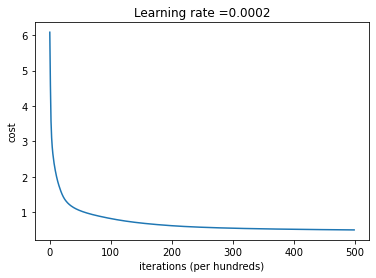

In [20]:
breast_cancer = datasets.load_breast_cancer()
X = np.array(breast_cancer.data)  
y = np.array(breast_cancer.target)

   
X_train, X_valid, y_train, y_valid = train_test_split( X, y, test_size=0.2, random_state=42)

X_mean=np.mean(X_train)
X_std=np.std(X_train)

X_valid=(X_valid-X_mean)/X_std
 
X_train = (X_train-X_mean)/X_std
y_train = one_hot_vector(y_train)
y_valid = one_hot_vector(y_valid)

d = model(X_train.T, y_train.T,X_valid.T, y_valid.T, n_h=20, num_iters=50000, alpha=0.0002, print_cost=True)
